# NBA Player Career Projection #
## _DSCI 100 Group Project_ ##

## Introduction ## 

Prompts:
- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and describe the dataset that was used to answer the question

Basketball is a globally renowned sport with a massive following, and the professional leagues are the pinnacle of talent and competition. Understanding player statistics is essential for team management, player evaluation, and fan engagement. The `all_seasons` dataset captures data that outlines the performance of basketball players across various seasons (from 1996-1997 season to 2022-2023 season). Using this dataset, our predictive question could be, for instance, how a player's attributes and performance in their rookie seasons relate to their overall career performance. The dataset encompasses several key attributes, including:

- `player_name`, name of a NBA player 
- `team_abbreviation`, abbreviated name of the team they played on
- `age`, a player's age
- `player_height`, a player's height
- `player_weight`, a player's weight 
- `college`, the college they played for
- `country`, their nationality
- `draft_year`, the year they were drafted
- `draft_round`, the round they were drafted in
- `draft_number`, the pick number they were drafted with
- `gp`, number of games played in a season
- `pts`, average points per game in a season
- `reb`, average rebounds per game in a season
- `ast`, average assists per game in a season
- `net_rating`, average net rating in a season
- `oreb_pct`, average offensive rebound percentage in a season
- `dreb_pct`, average defensive rebound percentage in a season
- `usg_pct`, average usage percentage in a season
- `ts_pct`, average true shooting percentage in a season
- `ast_pct`, average assist percentage in a season
- `season`, the season they played in which these stats were recorded


By analyzing this dataset, we aim to draw insights and patterns from past player statistics, potentially aiding in the selection, trading, and performance prediction of rookie players in future basketball seasons by estimating their potential through statistics. 

### Research question: ###
__How does a player's scoring statistic in their rookie year correlate to their total career points?__ We will attempt to answer this question by forming a regression line using the scoring statistics of past players in their rookie season, and more specifically: `pts` (points per game) to attempt to predict the total career points of rookie players.

## Methods and results ##

- describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.
- your report should include code which:
    - loads data from the original source on the web 
    - wrangles and cleans the data from it's original (downloaded) format to the format necessary for the planned analysis
    - performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
    - creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
    - performs the data analysis
    - creates a visualization of the analysis 
    
note: all tables and figure should have a figure/table number and a legend

## Preliminary exploratory data analysis ##

From the preliminary exploratory data analysis completed in our project proposal, we demonstrated that we can read the NBA data set can be read by downloading the dataset from the website (link: https://www.kaggle.com/datasets/justinas/nba-players-data/) and read into R using read_csv from the tidyverse library. We have stored it in the "data" folder. 

In our preliminary exploratory data analysis, we also completed necessary steps to tidy the data to ensure consistency, remove irrelevant information, and maintain the three criteria necessary for tidy data: each column is a variable, each row is a single observation, and each cell is a value. 

Here we install the necessary packages and libraries for our project.

In [4]:
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [66]:
# importing the tidyverse library
library(tidyverse)
library(tidymodels)
library(repr)
library("kknn")
library(ggplot2)
library("RColorBrewer")

Throughout this report, the data set we will work with is named `all_seasons.csv` and it lives in the `/data` directory. Below, we read the dataset using `read_csv` and used `head` to look at the first 6 rows of the dataset to ensure that we have read the correct dataset. 

In [6]:
# reading the dataset in the data folder
nba_raw <- read_csv("data/all_seasons.csv")
# looking at the the first 6 rows
tail(nba_raw)

New names:
• `` -> `...1`
Rows: 12844 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): player_name, team_abbreviation, college, country, draft_year, draf...
dbl (14): ...1, age, player_height, player_weight, gp, pts, reb, ast, net_ra...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,⋯,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
12838,Joe Wieskamp,TOR,23,198.12,92.98636,Iowa,USA,2021,2,⋯,1.0,0.4,0.3,1.0,0.000,0.068,0.115,0.321,0.083,2022-23
12839,Joel Embiid,PHI,29,213.36,127.00576,Kansas,Cameroon,2014,1,⋯,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20,213.36,86.18248,Florida State,USA,Undrafted,Undrafted,⋯,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25,205.74,102.51179,Wake Forest,USA,2017,1,⋯,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24,208.28,113.39800,Texas,USA,2021,2,⋯,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,JaMychal Green,GSW,33,205.74,102.96538,Alabama,USA,Undrafted,Undrafted,⋯,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


**Table 1.** Table of the first 6 rows of raw data from `all_seasons.csv`, named as`nba_raw` dataframe.

### Data tidying ###
Looking at the columns, we see that `draft_year` and `draft_round` are character columns, instead of numeric. Upon investigation into the data we see that this is because some players came into the NBA league undrafted and were picked up by teams through other methods, and thus are marked as `undrafted` under the `draft_year` and `draft_round` columns. Since we want to select and use rookie players who have only played in the 2022 season as our test data, we must filter out players who have played in more than one season for training and players who have only played in 2022 season for test data. However, because some players went undrafted, it is difficult to determine what year those players were rookies. (If we say that a player is a rookie in the first season of all the observations we have of them, then what happens if the first season of all the observations we have of them is the first season recorded in this data set and they were undrafted? Since we have no data of earlier seasons we wouldn't know if that season was truly their rookie season.) Thus, to make data manipulation and analysis easier, we will only consider players that were drafted.

Since `college`, `country` and the team that they played for (`team_abbreviation`) are completely irrelevant to our data analysis, we will select the rest of the columns during our data processing. Additionally, to make data manipulation easier, we will also change season into a numeric value by only keeping the year the season began (ex. "1996-1997" into 1996).

In [7]:
nba_data <- nba_raw |>
    filter(draft_year != "Undrafted" & draft_round != "Undrafted" & draft_number != "Undrafted") |>
    separate(season, into = c("season_start", "season_end"), "-") |>
    mutate(season_start = as.numeric(season_start), draft_year = as.numeric(draft_year), 
           draft_round = as.numeric(draft_round), draft_number = as.numeric(draft_number)) |>
    select(player_name, age:player_weight, draft_year:season_start) 
# looking at the first 6 rows of tidied data
head(nba_data)

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Randy Livingston,22,193.04,94.80073,1996,2,42,64,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996
Gaylon Nickerson,28,190.50,86.18248,1994,2,34,4,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996
George Lynch,26,203.20,103.41898,1993,1,12,41,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996
George McCloud,30,203.20,102.05820,1989,1,7,64,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996
George Zidek,23,213.36,119.74829,1995,1,22,52,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996
Gerald Wilkins,33,198.12,102.05820,1985,2,47,80,10.6,2.2,2.2,-5.8,0.031,0.064,0.203,0.503,0.143,1996


**Table 2.** Table of the first 6 rows of tidied `nba_raw` data, named as `nba_data`.

## Methods ##

Prompts 
- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?

- Describe at least one way that you will visualize the results

Since we are trying to predict the total number of points a player will amass over their career, which is a quantitative variable, we can use a regression model as opposed to a classification model. We opted for a **knn regression model** as opposed to a linear regression model, as a knn model requires few assumptions about what the data must look like, and works well with non-linear relationships. Additionally, in terms of scoring statistics, we know that due to physical limitations of humans and the vast amount of training data (past and current veteran NBA players) that we have, the testing data (current rookie players) will be not be drastically different compared to the training data and will most likely be close to or within the range of values input in the training data.

Initially, we believed that there were multiple variables that could potentially be predictors variables in our analysis (ie. scoring statistics such as: `pts` (points per game), `gp` (games played), `usg_pct` (usage percentage) and `ts_pct` (true shooting percentage). However, we realized that visualizing multiple predictor variables with the predicted variable in one graph would be impossible at our level of knowledge (requiring a 5 dimensional graph). Thus, we decided to choose what we believed to have potentially the greatest impact on influencing the total career points of a player as the predictor variable, which is `pts` (points per game). We chose points per game as it directly impacts the number a points a player scores. Additionally, by analyzing the graph between `pts` in a player's rookie season and total career points, we can also see how indicative a player's rookie season is in predicting their overall career. 

Using `pts` as a predictor, we will find the projected number of points a player will score based on the average of its K nearest neighbors where the K value will be determined through evaluation and tuning through cross validation by finding the K value with the lowest `RMSPE`. 

We will use scatter plots, with a regression line to visualize the data and results as it will give a clear view on the K nearest neighbors to the point on a line. Futhermore we will make distinctions between amount of seasons played by the player by colors in plots.

### Separating the data into training data and testing data ###

Before we can perform regression we first need to separate the data into training data and testing data. Since each observation in `nba_data` represents the statistics of an NBA player in one season, we need to reduce the data so that we only have the rookie season of NBA players (only one row per player). 

In [18]:
# trying to separate data into training data (excludes rookies) and test data (rookies)
nba_rookie <- nba_data |>
    filter(draft_year == 2022)

# nba_non_rookies is the data of all seasons of non_rookie players.
nba_non_rookies <- nba_data |>
    filter(draft_year >= 1996, draft_year <= 2021) 

nba_training <- nba_non_rookies |>
    filter(draft_year == season_start)

However, splitting the data like this mis-classifies some players. This is because some players did not play in the season they were drafted. For example, a player like _RaiQuan Gray_ is classified as a non_rookie and within `nba_non_rookies` even though his first season was in `2022`, however, his first season is not included in `nba_training` either since his first season is not the same as his draft year. Thus, he is excluded from the training set and testing set entirely.

In [16]:
nba_ray_non_rookie <- nba_non_rookies |>
    filter(player_name == "RaiQuan Gray")

nba_ray_non_rookie

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RaiQuan Gray,23,200.66,122.0162,2021,2,59,1,16,9,7,-17.5,0.075,0.176,0.205,0.621,0.35,2022


**Table 3.** Table showing season statistics of *RaiQuan Gray* in `nba_non_rookies`.

In [17]:
nba_ray_training <- nba_training |>
    filter(player_name == "RaiQuan Gray")

nba_ray_training

player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


**Table 4.** Table showing season statistics of *RaiQuan Gray* in `nba_training`. However, we can see that it does not exist in `nba_training`. 

To solve this issue we can use either `anti_join()` from the `dplyr` library or using specific indexing and `match`. First, we can use `match` and `unique` to get the first row occurence of a player in `nba_data`. Below we use `unique` to find the unique number of players in `nba_data`, and `match` to find the first recorded season of a player in `nba_data` and stored it as a object named `nba_first_season`. Using `select` and `unique`, we also find the names of all unique players and store it as `nba_unique_players`, then applying `nrow` to both data frames, we can check if we have missed any player in `nba_first_season`.

In [28]:
# This can be solved using this:
# df1[(df1$name %in% df2$name),] 
# or:
# library(dplyr)
# anti_join(df1, df2, by = "name")

# gets the first season of a unique nba player in nba_data
nba_first_season <- nba_data[match(unique(nba_data$player_name), nba_data$player_name),]
nrow(nba_first_season)

nba_unique_players <- nba_data |>
    select(player_name) |>
    unique()
nrow(nba_unique_players)

[1] 1760

[1] 1760

Next we split the data into training and testing data (rookies vs. non-rookies). Since we are getting the first occurrence of a player in `nba_data`, which begins in 1996, it is possible that the first occurrence season in `nba_first_season` is not their rookie season, so we will use `filter` to split players who started their first season in 2022 as testing data (`nba_testing`) and players who were drafted after 1996 but whose first season is before 2022 as the training set (`nba_training`). 

In [ ]:
# first season of rookies (defined as first season is 2022)
nba_testing <- nba_first_season |>
    filter(season_start == 2022)

# first season of non-rookies where draft year is after 1996 and the first season they've played is not 2022
nba_training <- nba_first_season |>
    filter(draft_year >= 1996, season_start < 2022)


However, we still need to find the total career points for our training data so that we can create a regression model. First we need to find  find all rows in `nba_data` where the player_name is also in our training data set. We use `%in%` to do so. 

In [ ]:
# data of all seasons of non-rookies
nba_non_rookies_data <- nba_data[(nba_data$player_name %in% nba_training$player_name),] 

Next we use `summarize` and `sum` to find the total career points for our non-rookie players drafted after 1996 as well as `n` to find the number of seasons they've played. Since `group_by` sorts the players alphabetically by name, but `nba_training` will have the players sorted in the original order of `nba_data`, which is chronologically, we sorted `nba_training` by players name before using `cbind` to bind `nba_total_points` and `nba_seasons_played` data frames to `nba_training` so that each player in `nba_training` will have the correct number of `total_points`. 

In [41]:
# finding number of seasons played of nba players drafted between 1996 and 2021 and played their first season before 2022
nba_seasons_played <- nba_non_rookies_data |>
    group_by(player_name) |>
    summarize("seasons_played" = n()) |>
    select("seasons_played")

# finding career points of nba players drafted between 1996 and 2021 and played their first season before 2022 
nba_total_points <- nba_non_rookies_data |>
    group_by(player_name) |>
    summarize("total_points" = sum(pts*gp)) |>
    select("total_points")

# nba_training_labelled <- cbind(nba_training, nba_total_points)
# head(nba_training_labelled)

# new problem is that the players are sorted alphabetically in total points but chronologically in nba_training
# to solve this issue, we must sort nba_training alphabetically and then cbind

nba_training_ordered <- nba_training[order(nba_training$player_name),]

nba_training_labelled <- cbind(nba_training_ordered, nba_total_points, nba_seasons_played)
head(nba_training_labelled)

,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start,total_points,seasons_played
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,A.J. Bramlett,23,208.28,102.96538,1999,2,39,8,1.0,2.8,0.0,-32.6,0.158,0.208,0.146,0.190,0.000,1999,8.0,1
2,A.J. Guyton,23,185.42,81.64656,2000,2,32,33,6.0,1.1,1.9,-12.4,0.018,0.053,0.169,0.495,0.198,2000,441.0,3
3,Aaron Brooks,23,182.88,73.02831,2007,1,26,51,5.2,1.1,1.7,-0.5,0.026,0.085,0.224,0.535,0.249,2007,48.4,1
4,Aaron Gordon,19,205.74,99.79024,2014,1,4,47,5.2,3.6,0.7,-5.6,0.064,0.171,0.156,0.517,0.064,2014,1521.7,6
5,Aaron Gray,23,213.36,122.46984,2007,2,49,61,4.3,2.8,0.7,-1.0,0.127,0.188,0.221,0.529,0.113,2007,6263.7,10
6,Aaron Holiday,22,185.42,83.91452,2018,1,23,50,5.9,1.3,1.7,7.0,0.008,0.088,0.206,0.518,0.180,2018,7993.0,9


**Table 5.** Table of first 6 rows of training data, which includes the statistics for the rookie season of players as well as total career points of each player and number of seasons played.

Here, we want to plot `pts`, points per game of a player's rookie season against their total career points, with the total number of seasons they've played colored. We see that there may be a weak positive correlation, as points per game increase in their rookie season, their total career points tend to increase as well.

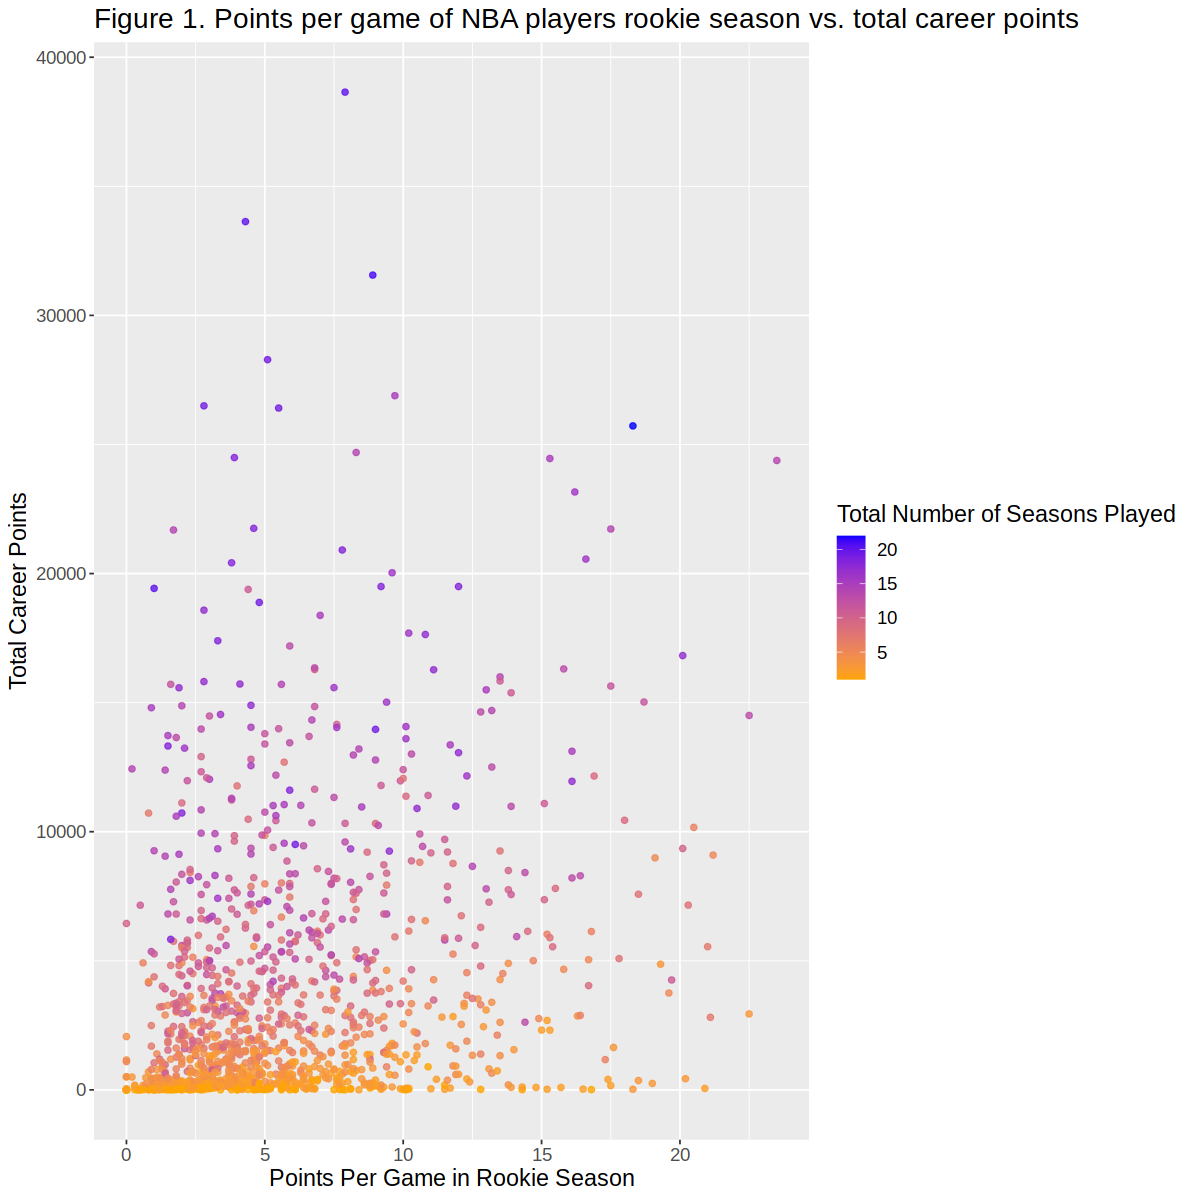

In [92]:
options(repr.plot.width = 10, repr.plot.height = 10)
nba_plot <- ggplot(nba_training_labelled, aes(x = pts,
                                                y = total_points, color = seasons_played)) +
  geom_point(alpha = 0.8) +
  labs(x = "Points Per Game in Rookie Season", y = "Total Career Points", 
       title = "Figure 1. Points per game of NBA players rookie season vs. total career points") + 
  theme(text = element_text(size = 14)) + 
    scale_colour_gradient(low = "orange", high = "blue", name = "Total Number of Seasons Played")
nba_plot

## Regression ##

Next we'll perform $k$-nn regression. First, we’ll use cross-validation on our **training data** to choose $k$. To determine the best $k$ value, we will use RMPSE. We want to find the $k$-value with the smallest RMPSE, since if the prediction values are very close to the true values, the RMSPE will be small.

Below, we created a model specification for $k$-nn, and use `"kknn"` as the model engine and `set_mode("regression")` in the model specification. We will store the model specification in an object called `nba_spec`. We created a recipe to preprocess our data and stored it in an object called `nba_recipe` specifying that the response variable is `total_points` and the predictor is `pts`.

In [48]:
set.seed(1234)
nba_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
       set_engine("kknn") |>
       set_mode("regression") 

nba_recipe <- recipe(total_points ~ pts, data = nba_training_labelled) |>
       step_scale(all_predictors()) |>
       step_center(all_predictors())

nba_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

Next, we created the splits for cross-validation with 5 folds using the `vfold_cv` function and stored in an object called `nba_vfold`. Then we used the workflow function to combine our model specification and recipe and stored it in an object called `nba_workflow`.

In [49]:
set.seed(1234)
nba_vfold <- vfold_cv(nba_training_labelled, v = 5, strata = total_points)
nba_workflow <- workflow() |>
    add_recipe(nba_recipe) |>
    add_model(nba_spec)
nba_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Then, we created a tibble with a column called neighbors that contains the sequence of values that goes from 1 to 301 by jumps of 10, and assigned the tibble to an object called `gridvals`. Next, we tuned our workflow such that it tests all the values in gridvals and resamples using our cross-validation data set. Finally, we collected the statistics from our model and assigned it to an object called `nba_results`.

In [54]:
set.seed(1234)
gridvals <- tibble(neighbors = seq(from = 1, to = 301, by = 10))

nba_results <- nba_workflow |>
    tune_grid(resamples = nba_vfold, grid = gridvals) |>
    collect_metrics() 

head(nba_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6.547026e+03,5,2.205871e+02,Preprocessor1_Model01
1,rsq,standard,1.307583e-02,5,9.148619e-03,Preprocessor1_Model01
11,rmse,standard,4.879016e+03,5,1.015369e+02,Preprocessor1_Model02
11,rsq,standard,3.154156e-02,5,2.459870e-03,Preprocessor1_Model02
21,rmse,standard,4.756272e+03,5,1.040831e+02,Preprocessor1_Model03
21,rsq,standard,5.340849e-02,5,4.359806e-03,Preprocessor1_Model03


Next we found the minimum RMSPE along with it's associated metrics such as the mean and standard error to find the best $k$ value.

In [55]:
results_min <- nba_results |>
    filter(.metric == "rmse") |>
    slice_min(mean, n = 1)
results_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
271,rmse,standard,4678.589,5,102.4283,Preprocessor1_Model28


Finally, we pulled the best neighbors value from `results_min` and store it an object called `k_min`. Following that, we repeated the workflow analysis again but with a brand new model specification with `k_min`. We stored our new model specification in an object called `nba_best_spec` and our new workflow analysis in an object called `nba_best_fit`.

Then, we used the `predict` function to make predictions on the test data and stored the predictions in an object called `nba_preds`.

In [62]:
set.seed(1234)
k_min <- results_min |>
          pull(neighbors)

nba_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
          set_engine("kknn") |>
          set_mode("regression")

nba_best_fit <- workflow() |>
          add_recipe(nba_recipe) |>
          add_model(nba_best_spec) |>
          fit(data = nba_training_labelled)

nba_preds <- nba_best_fit |>
  predict(nba_testing) |>
  bind_cols(nba_testing)
head(nba_preds)

.pred,player_name,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season_start
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5693.545,RaiQuan Gray,23,200.66,122.01625,2021,2,59,1,16.0,9.0,7.0,-17.5,0.075,0.176,0.205,0.621,0.350,2022
2827.538,Peyton Watson,20,200.66,90.71840,2022,1,30,23,3.3,1.6,0.5,-12.0,0.043,0.139,0.174,0.553,0.087,2022
2916.676,Patrick Baldwin,20,205.74,99.79024,2022,1,28,31,3.9,1.3,0.4,-12.3,0.004,0.188,0.227,0.546,0.083,2022
5693.545,Paolo Banchero,20,208.28,113.39800,2022,1,1,72,20.0,6.9,3.7,-4.2,0.035,0.174,0.272,0.529,0.171,2022
2206.963,Ryan Rollins,20,190.50,81.64656,2022,2,44,12,1.9,1.0,0.5,-38.1,0.043,0.153,0.260,0.508,0.214,2022
2639.900,Moussa Diabate,21,208.28,95.25432,2022,2,43,22,2.7,2.3,0.2,-3.2,0.137,0.106,0.125,0.546,0.029,2022


**Table 6.** Table of the first 6 rows of our testing data with total points predictions.

## Visualization ##

We want to visualize what the relationship between `pts` and `total_points` looks like with our best $k$-value. 

Thus, we created a scatterplot with the points per game in a player's rookie season against their total career points from `nba_training_labelled`. Then we assigned our plot to an object called `nba_plot_pts_vs_tp`. Additionally, we plotted the predictions from `nba_preds` as a blue line over the data points.

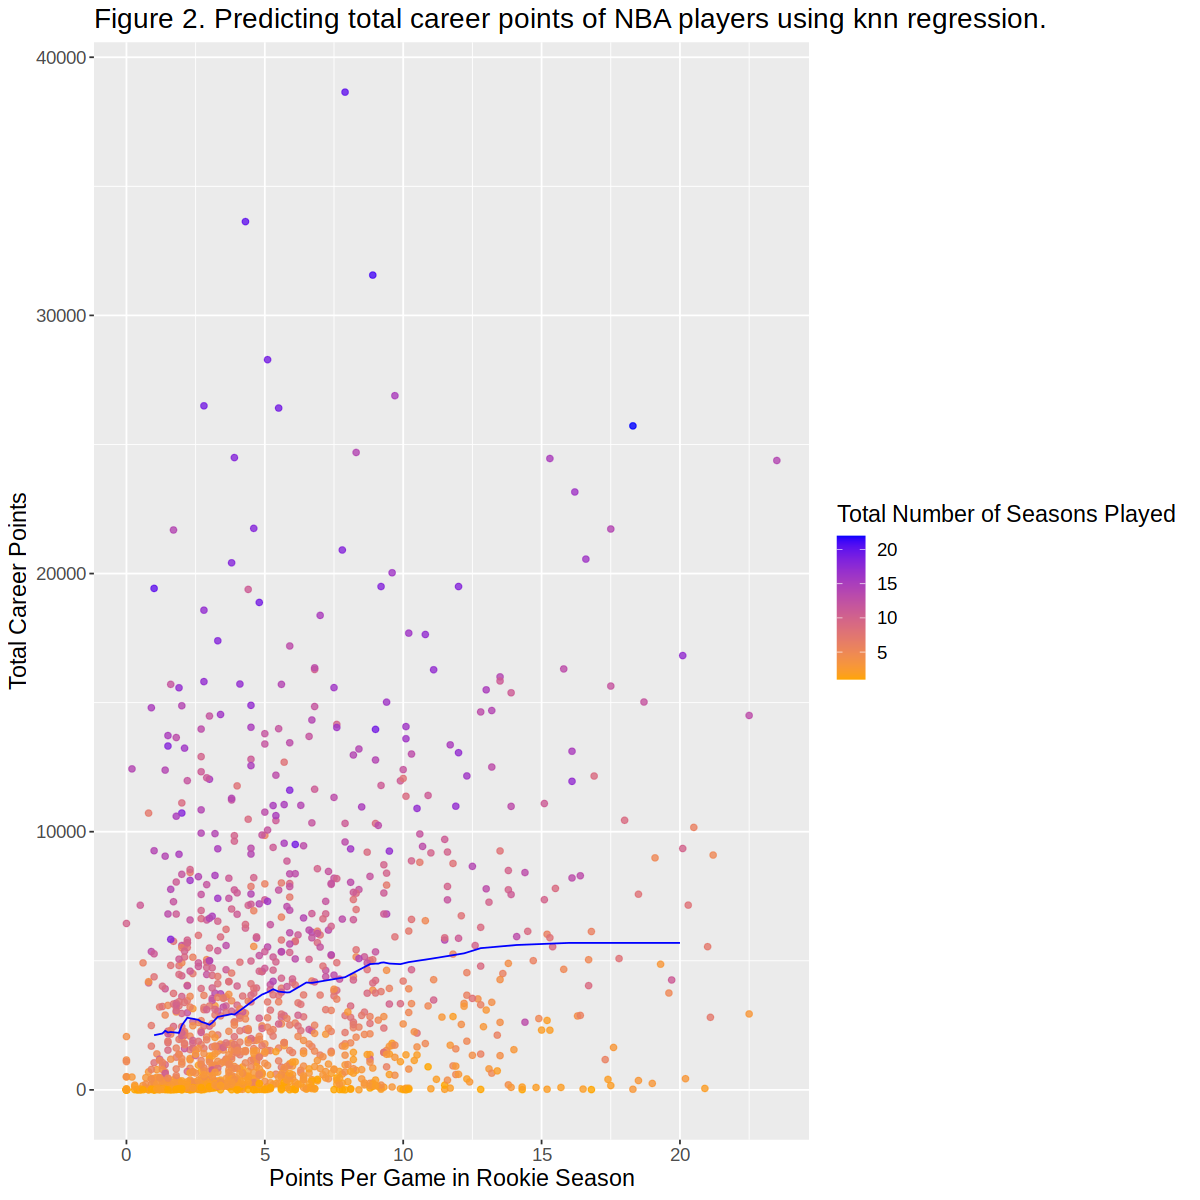

In [90]:
# Visualization
###################################################################
# plot of points vs. total points
options(repr.plot.width = 10, repr.plot.height = 10)
nba_plot_pts_vs_tp <- ggplot(nba_training_labelled, aes(x = pts,
                                                y = total_points, color = seasons_played)) +
  geom_point(alpha = 0.8) +
  geom_line(data = nba_preds, aes(x = pts, y = .pred), color = "blue") +
  labs(x = "Points Per Game in Rookie Season", y = "Total Career Points", 
       title = "Figure 2. Predicting total career points of NBA players using knn regression.") + 
  theme(text = element_text(size = 14)) + 
    scale_colour_gradient(low = "orange", high = "blue", name = "Total Number of Seasons Played")
nba_plot_pts_vs_tp


## Discussion ##
Prompts
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

Summary of Findings:
* The key outcome of our analysis is the prediction that Paolo Banchero will have the highest total career points (6477) among the rookies analyzed.
* There's a positive correlation between rookie points per game and total career points, indicating that early performance can be an indicator of long-term scoring potential. However, the correlation seems quite weak as points are scattered fairly randomly.
* The predicted total career points were lower than expected, likely due to including all NBA players, even those with short careers, which is not accounted for when forming the regression line and model.

Expectations vs. Reality:
* While it was anticipated that players with high rookie points per game would have the highest total career points, the lower-than-expected values highlighted an important aspect: the impact of career longevity. This may have occured since we took into consideration of all NBA players, including those who've had very short careers. The average career length of an NBA player is 4.5 years, thus, players who have only played a few years have likely caused the overall low predicted career points. If we were able to decide on a minimum requirement for the number of games played, we may have gotten results that were closer to our expectations.

Impact of Findings:
* These insights could be pivotal for NBA teams in making strategic decisions regarding rookie players. By understanding the potential correlation between early performance and career longevity, teams can better assess the long-term value of players.
* With these results, teams could make more well informed decisions on whether they should cut, trade, or keep their rookie. Furthermore, depending on how high their predicted total points are, teams could decide whether or not the rookie is good enough to be the future star of the team that helps them win an NBA championship.
* The model's predictions could influence decisions on trades, player development, and drafting strategies, potentially altering the way teams invest in rookie talent.
* After a few years, NBA teams could compare their total points to these findings and see if they are still on a similar trajectory or not. Furthermore, teams could examine the impact of injuries on the trajectory of players. Less than half of NBA player who suffered groin, hip, ankle, thigh or ankle injuries have played in the NBA 2 years after their injury; thus, injuries could have a significant impact on a player's career. 

Limitations and Impact on Results vs. Expectations:
* Visualizing and predicting only points may have led to an underestimation of some players' overall impact and potential. Players who excel in areas not directly related to scoring might have been underrated in our model.
* Players with injuries in their rookie seasons may have a low predicted total points in this model, but may become significantly better later in their career. Conversely, a player may get injured after their rookie season and may end up with significantly less total points than expected.
* Moreover, due to the limitations of the kknn regression model, we were only able to visualize a plot using rookie points per game. For the future, we could visualize our results using other predictors such as games played, true shooting percentage and usage percentage, which may allow us to make more meaningful observations.

## References ##


Bullock, Garret S, et al. “Return to Performance Following Severe Ankle, Knee, and Hip Injuries in National Basketball Association Players.” Academic.Oup.Com, Sept. 2022, academic.oup.com/pnasnexus/article/1/4/pgac176/6691726. 

Luke. “What Is the Average Career Length of an NBA Player?” Dunk or Three, 11 Oct. 2021, dunkorthree.com/nba-player-career-length/. 

Cirtautas, Justinas. “NBA Players.” Kaggle, 13 Oct. 2023, www.kaggle.com/datasets/justinas/nba-players-data/. 